# Generate the figures

## Imports

In [2]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns
import os
import pandas as pd
import muon as mu
import scanpy as sc
import mofax

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Make plots pretty

In [3]:
# Plots configuration.

from tueplots import axes as tue_axes
from tueplots import cycler as tue_cycler
from tueplots import fonts as tue_fonts
from tueplots.constants import markers as tue_markers
from tueplots.constants.color import palettes as tue_palettes

plt.rcParams.update({"figure.dpi": 80})
plt.rcParams.update(tue_axes.spines(left=True, right=False, top=False, bottom=True))
plt.rcParams.update(tue_axes.grid())
plt.rcParams.update(tue_cycler.cycler(color=tue_palettes.high_contrast))
plt.rcParams.update(tue_axes.legend(shadow=False, frameon=False, fancybox=False))
plt.rcParams.update(tue_fonts.neurips2021_tex(family="sans-serif"))

## Load the data

In [9]:
# Define the data and figure folder.
data_folder = "/users/csb/huizing/Documents/PhD/Code/mowgli_reproducibility/data/"
res_folder = "/users/csb/huizing/Documents/PhD/Code/Mowgli/local_analysis/from_jz/w/"

# Define data paths for different datasets.
data_path = {
    "Liu": data_folder + "Liu/liu_preprocessed.h5mu.gz",
    "sim1": data_folder + "Liu/liu_simulated_1.h5mu.gz",
    "sim2": data_folder + "Liu/liu_simulated_2.h5mu.gz",
    "sim3": data_folder + "Liu/liu_simulated_3.h5mu.gz",
    "sim4": data_folder + "Liu/liu_simulated_4.h5mu.gz",
    "sim5": data_folder + "Liu/liu_simulated_5.h5mu.gz",
    "10X PBMC": data_folder + "10X_PBMC_10k/pbmc_preprocessed.h5mu.gz",
    "Open Problems Multiome": data_folder + "OP_multiome/opmultiome_preprocessed.h5mu.gz",
    "Open Problems CITE-seq": data_folder + "OPCITE/opcite_preprocessed.h5mu.gz",
    "Bone Marrow CITE-seq": data_folder + "BMCITE/bmcite_preprocessed.h5mu.gz",
}

mowgli_path = {
    "Liu": res_folder + "liu_mowgli_cosine_5_0_1_rna_0_01_atac_0_1_adt_0_01_0_001.npy",
    "sim1": res_folder + "liu_sim_1_mowgli_cosine_5_0_1_rna_0_01_atac_0_1_adt_0_01_0_001.npy",
    "sim2": res_folder + "liu_sim_2_mowgli_cosine_5_0_1_rna_0_01_atac_0_1_adt_0_01_0_001.npy",
    "sim3": res_folder + "liu_sim_3_mowgli_cosine_5_0_1_rna_0_01_atac_0_1_adt_0_01_0_001.npy",
    "sim4": res_folder + "liu_sim_4_mowgli_cosine_5_0_1_rna_0_01_atac_0_1_adt_0_01_0_001.npy",
    "sim5": res_folder + "liu_sim_5_mowgli_cosine_5_0_1_rna_0_01_atac_0_1_adt_0_01_0_001.npy",
    "10X PBMC": res_folder + "pbmc_mowgli_cosine_50_0_05_rna_0_01_atac_0_1_adt_0_001_0_001.npy",
    "Open Problems Multiome": res_folder + "opmultiome_mowgli_cosine_50_0_05_rna_0_01_atac_0_1_adt_0_001_0_001.npy",
    "Open Problems CITE-seq": res_folder + "opcite_mowgli_cosine_50_0_05_0_01_0_001.npy",
    "Bone Marrow CITE-seq": res_folder + "bmcite_mowgli_cosine_50_0_05_0_01_0_001.npy",
}

mofa_path = {
    "Liu": data_folder + "Liu/liu_mofa_5.hdf5",
    "sim1": data_folder + "Liu/liu_simulated_1_mofa_5.hdf5",
    "sim2": data_folder + "Liu/liu_simulated_2_mofa_5.hdf5",
    "sim3": data_folder + "Liu/liu_simulated_3_mofa_5.hdf5",
    "sim4": data_folder + "Liu/liu_simulated_4_mofa_5.hdf5",
    "sim5": data_folder + "Liu/liu_simulated_5_mofa_5.hdf5",
    "10X PBMC": data_folder + "10X_PBMC_10k/pbmc_mofa_15.hdf5",
    "Open Problems Multiome": data_folder + "OP_multiome/opmultiome_mofa_15.hdf5",
    "Open Problems CITE-seq": data_folder + "OPCITE/opcite_mofa_15.hdf5",
    "Bone Marrow CITE-seq": data_folder + "BMCITE/bmcite_mofa_15.hdf5",
}

nmf_path = {
    "Liu": data_folder + "Liu/liu_nmf_5.npy",
    "sim1": data_folder + "Liu/liu_simulated_1_nmf_5.npy",
    "sim2": data_folder + "Liu/liu_simulated_2_nmf_5.npy",
    "sim3": data_folder + "Liu/liu_simulated_3_nmf_5.npy",
    "sim4": data_folder + "Liu/liu_simulated_4_nmf_5.npy",
    "sim5": data_folder + "Liu/liu_simulated_5_nmf_5.npy",
    "10X PBMC": data_folder + "10X_PBMC_10k/pbmc_nmf_30.npy",
    "Open Problems Multiome": data_folder + "OP_multiome/opmultiome_nmf_30.npy",
    "Open Problems CITE-seq": data_folder + "OPCITE/opcite_nmf_30.npy",
    "Bone Marrow CITE-seq": data_folder + "BMCITE/bmcite_nmf_30.npy",
}

seurat_path = {
    "Liu": data_folder + "Liu/liu_seurat_umap.csv",
    "sim1": data_folder + "Liu/liu_simulated_1_seurat_umap.csv",
    "sim2": data_folder + "Liu/liu_simulated_2_seurat_umap.csv",
    "sim3": data_folder + "Liu/liu_simulated_3_seurat_umap.csv",
    "sim4": data_folder + "Liu/liu_simulated_4_seurat_umap.csv",
    "sim5": data_folder + "Liu/liu_simulated_5_seurat_umap.csv",
    "10X PBMC": data_folder + "10X_PBMC_10k/pbmc_seurat_umap.csv",
    "Open Problems Multiome": data_folder + "OP_multiome/opmultiome_seurat_umap.csv",
    "Open Problems CITE-seq": data_folder + "OPCITE/opcite_seurat_umap.csv",
    "Bone Marrow CITE-seq": data_folder + "BMCITE/bmcite_seurat_umap.csv",
}

## Make the UMAPS

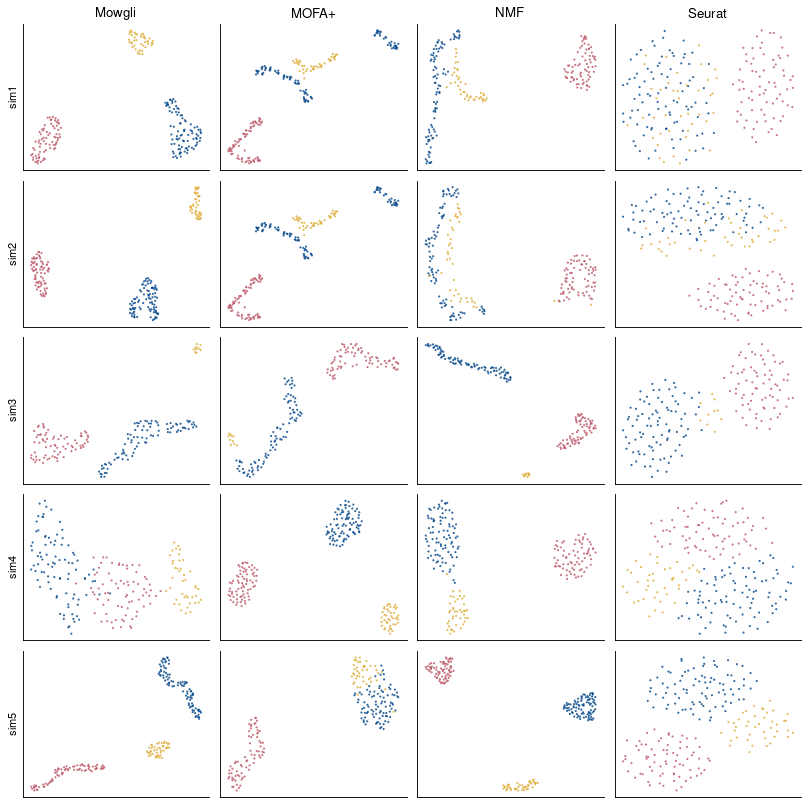

In [12]:
# List the datasets.

datasets = [
    "sim1",
    "sim2",
    "sim3",
    "sim4",
    "sim5",
]

# Define the subplots.
fig = plt.figure(constrained_layout=True, figsize=(10, 10))
axes = fig.subplots(5, 4)

for i, dataset in enumerate(datasets):

    mdata = mu.read_h5mu(data_path[dataset])

    for j in range(4):

        if j == 0:
            X_mowgli = np.load(mowgli_path[dataset], allow_pickle=True).item()["W"]
            mdata.obsm["X_mowgli"] = X_mowgli
            mdata.uns = {}
            sc.pp.neighbors(mdata, use_rep="X_mowgli", n_neighbors=20)
            sc.tl.umap(mdata)

        elif j == 1:
            mofa_object = mofax.mofa_model(mofa_path[dataset])
            mdata.obsm["X_mofa"] = mofa_object.get_factors()
            mdata.uns = {}
            sc.pp.neighbors(mdata, use_rep="X_mofa", n_neighbors=20)
            sc.tl.umap(mdata)

        elif j == 2:
            mdata.obsm["X_nmf"] = np.load(nmf_path[dataset])
            mdata.uns = {}
            sc.pp.neighbors(mdata, use_rep="X_nmf", n_neighbors=20)
            sc.tl.umap(mdata)

        elif j == 3:
            mdata.obsm["X_umap"] = pd.read_csv(seurat_path[dataset], index_col=0).to_numpy()
            mdata.uns = {}

        sc.pl.umap(mdata, ax=axes[i, j], color="rna:celltype", s=15, alpha=.8, title="", show=False)

        axes[i, j].set_facecolor((0, 0, 0, 0))
        axes[i, j].set(xlabel=None)
        axes[i, j].get_legend().remove()

        if j > 0:
            axes[i, j].set(ylabel=None)
        else:
            axes[i, j].set(ylabel=dataset)

axes[0, 0].set_title("Mowgli")
axes[0, 1].set_title("MOFA+")
axes[0, 2].set_title("NMF")
axes[0, 3].set_title("Seurat")

plt.show()

/users/csb/huizing/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'feature_types' as categorical
/users/csb/huizing/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'feature_types' as categorical
/users/csb/huizing/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a fut

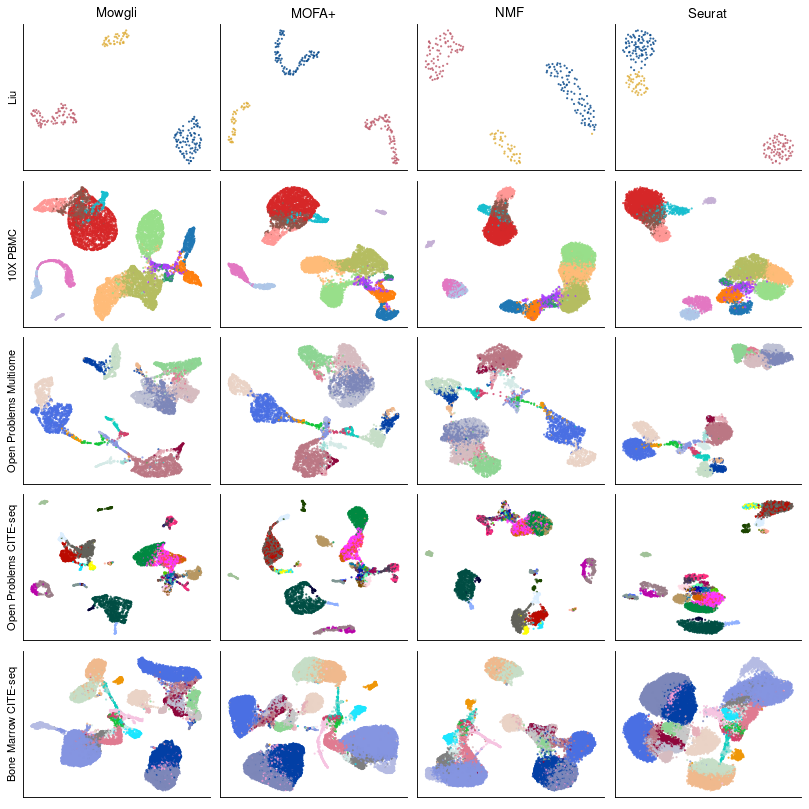

In [ ]:
# List the datasets.

datasets = [
    "Liu",
    "10X PBMC",
    "Open Problems Multiome",
    "Open Problems CITE-seq",
    "Bone Marrow CITE-seq",
]

# Define the subplots.
fig = plt.figure(constrained_layout=True, figsize=(10, 10))
axes = fig.subplots(5, 4)

for i, dataset in enumerate(datasets):

    mdata = mu.read_h5mu(data_path[dataset])

    for j in range(4):

        if j == 0:
            X_mowgli = np.load(mowgli_path[dataset], allow_pickle=True).item()["W"]
            mdata.obsm["X_mowgli"] = X_mowgli
            mdata.uns = {}
            sc.pp.neighbors(mdata, use_rep="X_mowgli", n_neighbors=20)
            sc.tl.umap(mdata)

        elif j == 1:
            mofa_object = mofax.mofa_model(mofa_path[dataset])
            mdata.obsm["X_mofa"] = mofa_object.get_factors()
            mdata.uns = {}
            sc.pp.neighbors(mdata, use_rep="X_mofa", n_neighbors=20)
            sc.tl.umap(mdata)

        elif j == 2:
            mdata.obsm["X_nmf"] = np.load(nmf_path[dataset])
            mdata.uns = {}
            sc.pp.neighbors(mdata, use_rep="X_nmf", n_neighbors=20)
            sc.tl.umap(mdata)

        elif j == 3:
            mdata.obsm["X_umap"] = pd.read_csv(seurat_path[dataset], index_col=0).to_numpy()
            mdata.uns = {}

        sc.pl.umap(mdata, ax=axes[i, j], color="rna:celltype", s=15, alpha=.8, title="", show=False)

        axes[i, j].set_facecolor((0, 0, 0, 0))
        axes[i, j].set(xlabel=None)
        axes[i, j].get_legend().remove()

        if j > 0:
            axes[i, j].set(ylabel=None)
        else:
            axes[i, j].set(ylabel=dataset)

axes[0, 0].set_title("Mowgli")
axes[0, 1].set_title("MOFA+")
axes[0, 2].set_title("NMF")
axes[0, 3].set_title("Seurat")

plt.show()